In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

# Install termcolor if not already installed
%pip install termcolor
import termcolor

Note: you may need to restart the kernel to use updated packages.


In [4]:

# Read in Air Quality data
aq_df = pd.read_csv("C:\\Users\\sso\\Desktop\\BOOTCAMP\\county_annual_aqi.csv")
aq_df.head()
     

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,205,58,1,0,0,0,129,57,39,0,0,169,95,0
1,Alabama,Clay,2015,112,73,39,0,0,0,0,92,56,43,0,0,0,112,0
2,Alabama,Colbert,2015,280,221,59,0,0,0,0,76,56,39,0,0,179,101,0
3,Alabama,DeKalb,2015,363,294,68,1,0,0,0,101,55,38,0,0,284,79,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0


In [5]:

display(aq_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                6151 non-null   object
 1   County                               6151 non-null   object
 2   Year                                 6151 non-null   int64 
 3   Days with AQI                        6151 non-null   int64 
 4   Good Days                            6151 non-null   int64 
 5   Moderate Days                        6151 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  6151 non-null   int64 
 7   Unhealthy Days                       6151 non-null   int64 
 8   Very Unhealthy Days                  6151 non-null   int64 
 9   Hazardous Days                       6151 non-null   int64 
 10  Max AQI                              6151 non-null   int64 
 11  90th Percentile AQI                  6151 n

None

In [6]:
aq_ny_wa_nm_df = aq_df.loc[(aq_df['State'] == 'New York') | (aq_df['State'] == 'Washington') | (aq_df['State'] == 'New Mexico')]
aq_ny_wa_nm_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
569,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,0,0,236,95,34
570,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0,0,0,112,0
571,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0,0,0,114,0
572,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,0,1,156,168,40
573,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0,3,353,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,Washington,Thurston,2020,366,316,43,0,3,4,0,242,53,28,0,0,118,248,0
6088,Washington,Walla Walla,2020,366,297,60,0,1,2,6,855,55,26,0,0,0,201,165
6089,Washington,Whatcom,2020,366,341,16,2,4,3,0,237,44,24,0,0,120,246,0
6090,Washington,Whitman,2020,366,335,23,1,5,2,0,237,47,19,0,0,0,366,0


In [7]:
aq_2015_3states_df = aq_ny_wa_nm_df.loc[(aq_ny_wa_nm_df['Year'] == 2015)]
aq_2015_3states_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
569,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,0,0,236,95,34
570,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0,0,0,112,0
571,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0,0,0,114,0
572,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,0,1,156,168,40
573,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0,3,353,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Washington,Thurston,2015,357,295,62,0,0,0,0,99,58,34,0,0,140,217,0
977,Washington,Walla Walla,2015,362,289,69,3,1,0,0,153,56,26,0,0,0,362,0
978,Washington,Whatcom,2015,331,279,52,0,0,0,0,91,53,34,0,0,95,236,0
979,Washington,Whitman,2015,362,297,57,7,1,0,0,185,56,26,0,0,0,362,0


In [8]:
aq_ny_df = aq_ny_wa_nm_df.loc[aq_ny_wa_nm_df['State'] == 'New York']
aq_ny_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
585,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1,0,182,182,0
586,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,0,49,125,191,0
587,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,0,0,317,45,0
588,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,0,0,358,0,0
589,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,0,9,88,268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731,New York,Steuben,2020,365,330,35,0,0,0,0,81,49,36,0,0,249,116,0
5732,New York,Suffolk,2020,366,282,78,6,0,0,0,133,63,40,0,0,248,118,0
5733,New York,Tompkins,2020,364,359,5,0,0,0,0,64,44,34,0,0,364,0,0
5734,New York,Wayne,2020,327,305,22,0,0,0,0,80,46,34,0,0,327,0,0


In [13]:
# Create an interactive map of the Air Quality data for each counties in New York
aq_ny_df_2015 = aq_ny_df[aq_ny_df["Year"] == 2015]



In [16]:
max_good_days = aq_ny_df_2015[aq_ny_df_2015['Good Days'] == aq_ny_df_2015['Good Days'].max()]
max_moderate_days = aq_ny_df_2015[aq_ny_df_2015['Moderate Days'] == aq_ny_df_2015['Moderate Days'].max()]
max_unhealthy_sensitive_days = aq_ny_df_2015[aq_ny_df_2015['Unhealthy for Sensitive Groups Days'] == aq_ny_df_2015['Unhealthy for Sensitive Groups Days'].max()]



In [17]:
def print_colored(text, color):
    print(termcolor.colored(text, color))

In [18]:
print_colored("The county with the most good AQI days in 2015 is: ", "green")
print_colored(max_good_days, "green")
print_colored("The county with the most moderate AQI days in 2015 is: ", "yellow")
print_colored(max_moderate_days, "yellow")
print_colored("The county with the most unhealthy AQO for sensitive groups days in 2015 is: ", "red")
print_colored(max_unhealthy_sensitive_days, "red")


The county with the most good AQI days in 2015 is: 
        State    County  Year  Days with AQI  Good Days  Moderate Days  \
593  New York  Herkimer  2015            360        351              9   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
593                                    0               0                    0   

     Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
593               0       84                   44          33        0   

     Days NO2  Days Ozone  Days PM2.5  Days PM10  
593         0         360           0          0  
The county with the most moderate AQI days in 2015 is: 
        State    County  Year  Days with AQI  Good Days  Moderate Days  \
589  New York      Erie  2015            365        156            205   
598  New York  New York  2015            365        156            205   

     Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
589                      

In [20]:
def classify_county(row):
    max_category = max(row['Good Days'], row['Moderate Days'], row['Unhealthy for Sensitive Groups Days'], row['Unhealthy Days'], row['Very Unhealthy Days'], row['Hazardous Days'])
    if max_category == row['Good Days']:
        return 'Good'
    elif max_category == row['Moderate Days']:
        return 'Moderate'
    elif max_category == row['Unhealthy for Sensitive Groups Days']:
        return 'Unhealthy for Sensitive Groups'
    elif max_category == row['Unhealthy Days']:
        return 'Unhealthy'
    elif max_category == row['Very Unhealthy Days']:
        return 'Very Unhealthy'
    elif max_category == row['Hazardous Days']:
        return 'Hazardous'
    else:
        return 'Unknown'

In [21]:
# Set color mpa for the categories
color_map = {'Good': 'green', 'Moderate': 'yellow', 'Unhealthy for Sensitive Groups': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple', 'Hazardous': 'black'}   

In [39]:
# Create a new interactive map of the Air Quality data for each counties in New York with the categories of AQI
aq_ny_df_2015['Category'] = aq_ny_df_2015.apply(classify_county, axis=1)
aq_ny_df_2015['Color'] = aq_ny_df_2015['Category'].map(color_map)
ny_map = folium.Map(location=[42.651167, -74.217696], zoom_start=7)
for index, row in aq_ny_df_2015.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=row['Color'], fill=True, fill_color=row['Color']).add_to(ny_map)
ny_map.save('ny_aqi_2015.html')
ny_map

C:\Users\sso\AppData\Local\Temp\ipykernel_8040\2274385533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Good Days', y='County', data=aq_ny_df_2015, palette='Greens')


<Axes: xlabel='Good Days', ylabel='County'>

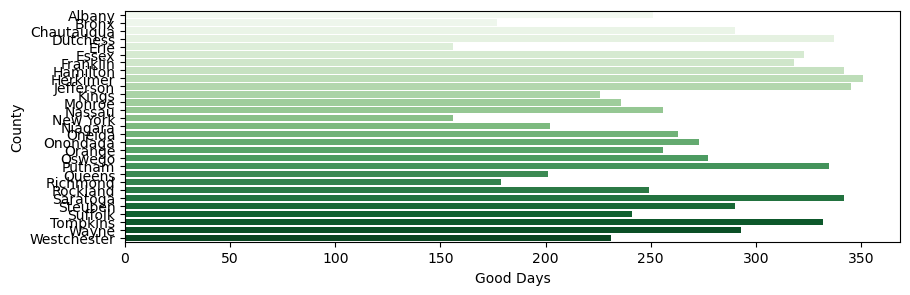

In [ ]:

sns.barplot(x='Good Days', y='County', data=aq_ny_df_2015, palette='Greens')

In [9]:

aq_wa_df = aq_ny_wa_nm_df.loc[aq_ny_wa_nm_df['State'] == 'Washington']
aq_wa_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,combined_unhealthy
952,Washington,Adams,2015,356,294,57,2,3,0,0,165,55,27,0,0,0,356,0,5
953,Washington,Asotin,2015,267,177,90,0,0,0,0,84,63,36,0,0,0,267,0,0
954,Washington,Benton,2015,362,269,83,8,1,0,1,483,66,37,0,0,74,267,21,9
955,Washington,Chelan,2015,362,243,116,3,0,0,0,148,65,33,0,0,0,362,0,3
956,Washington,Clallam,2015,364,263,101,0,0,0,0,80,58,41,1,0,178,185,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6087,Washington,Thurston,2020,366,316,43,0,3,4,0,242,53,28,0,0,118,248,0,7
6088,Washington,Walla Walla,2020,366,297,60,0,1,2,6,855,55,26,0,0,0,201,165,3
6089,Washington,Whatcom,2020,366,341,16,2,4,3,0,237,44,24,0,0,120,246,0,9
6090,Washington,Whitman,2020,366,335,23,1,5,2,0,237,47,19,0,0,0,366,0,8
